In [1]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
%matplotlib inline
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import TimeDistributed

In [2]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
 return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [3]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
 X, y = list(), list()
 for _ in range(n_patterns):
  p = randint(10, 20)
  d = uniform(0.01, 0.1)
  sequence = generate_sequence(length + output, p, d)
  X.append(sequence[:-output])
  y.append(sequence[-output:])
 X = array(X).reshape(n_patterns, length, 1)
 y = array(y).reshape(n_patterns, output)
 return X, y

In [4]:
# configure problem
length = 50
output = 5

# Define the model

In [5]:
model = Sequential()
model.add(Bidirectional(LSTM(30, return_sequences=True), input_shape=(length, 1), merge_mode='concat'))
model.add(Bidirectional(LSTM(30, return_sequences=True), input_shape=(length, 1), merge_mode='concat'))
model.add(Bidirectional(LSTM(30, return_sequences=True), input_shape=(length, 1), merge_mode='concat'))
model.add(Bidirectional(LSTM(30), input_shape=(length,1)))
model.add(Dense(output))
model.compile(loss= 'mae' , optimizer= 'adam' )
#model.build()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 50, 60)            7680      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 60)            21840     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 60)            21840     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60)                21840     
_________________________________________________________________
dense (Dense)                (None, 5)                 305       
Total params: 73,505
Trainable params: 73,505
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# fit model
X, y = generate_examples(length, 15000, output)
history = model.fit(X, y, batch_size=32, epochs=15)


Train on 15000 samples
Epoch 1/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0076
Epoch 2/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0061
Epoch 3/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0048
Epoch 4/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0044
Epoch 5/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0043
Epoch 6/15
15000/15000 [==============================] - 23s 2ms/sample - loss: 0.0037
Epoch 7/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0033
Epoch 8/15
15000/15000 [==============================] - 23s 2ms/sample - loss: 0.0031
Epoch 9/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0031
Epoch 10/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0028
Epoch 11/15
15000/15000 [==============================] - 22s 1ms/sample - loss: 0.0027
Epoch 1

In [10]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print( 'MAE %f:' % loss)

MAE 0.002367:


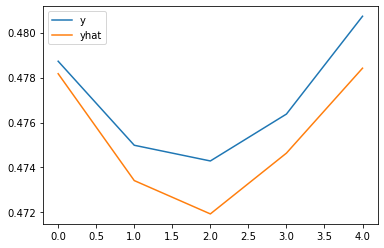

In [16]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label='y' )
pyplot.plot(yhat[0], label='yhat' )
pyplot.legend()
pyplot.show()